In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Tau Leaping and Gillespie/ext_rate_threshold.csv')
df['Dead'] = df['FinalTime'] < 150

dfext = df.groupby(['SeasonLength','umbral','Dead']).count().reset_index()
dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000
dfext

,SeasonLength,umbral,Dead,Trajectory,FinalTime,ExtRate
0,1,3,False,1000,1000,0.000
1,1,4,False,998,998,0.002
3,1,5,False,994,994,0.006
5,1,6,False,997,997,0.003
7,1,7,False,996,996,0.004
...,...,...,...,...,...,...
1186,100,4,False,769,769,0.231
1188,100,5,False,741,741,0.259
1190,100,6,False,718,718,0.282
1192,100,7,False,732,732,0.268


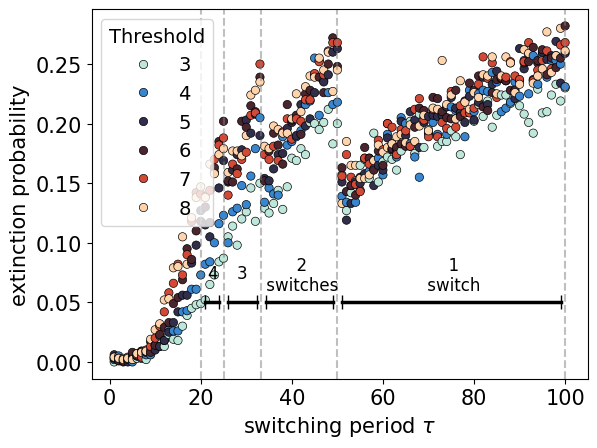

In [3]:
sns.scatterplot(data=dfext, x='SeasonLength', y='ExtRate', hue='umbral', palette='icefire', ec='black')


for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)
    if i == 3 or i==4:
        #plt.text(100/i - 5,0.0,str(i)+' switches',rotation='vertical',fontsize=15)
        pass
        
plt.text(75,0.06,'  1 \n switch',fontsize=12,ha='center')
plt.plot([51,99],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.text(83.3/2,0.06,'  2 \n switches',fontsize=12,ha='center')#,bbox=dict(facecolor='white', edgecolor='black'))
plt.plot([34.3,49],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.text((100/4 + 100/3)/2,0.07,'3',fontsize=12,ha='center')
plt.plot([100/4+1,100/3-1],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)
plt.text((100/4 + 100/5)/2,0.07,'4',fontsize=12,ha='center')
plt.plot([100/5+1,100/4-1],[0.05,0.05],marker='|',color='black',linewidth=2.5,ms=10)

plt.xlabel('switching period '+r'$\tau$', fontsize=15)
plt.ylabel('extinction probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Threshold',fontsize=14, title_fontsize=14, loc='upper left')
#plt.savefig('Figsupp-threshold.png',dpi=300)
plt.show()

**Changing the extinction threshold does not change the qualitative behaviour of the extinction curve.** 
Different thresholds for determining when a population is considered to be extinct, from 3\% to 8\% of theoretical carrying capacity. In the main text 5\% has been used as the threshold.